In [ ]:
## EDA Performance Analysis

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('stud.csv')


In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
# checking missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
#check duplicate values
df.duplicated().sum()

0

In [8]:
 # check data types
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [9]:
#check information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# checking the unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
#descriptive statistics
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#Exploring data

In [12]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [14]:
print('categorical in gender column:',df.gender.unique())
print('categorical in race_ethnicity column:',df.race_ethnicity.unique())
print('categorical in parental_level_of_education column:',df.parental_level_of_education.unique())
print('categorical in lunch column:',df.lunch.unique())
print('categorical in test_preparation_course column:',df.test_preparation_course.unique())

categorical in gender column: ['female' 'male']
categorical in race_ethnicity column: ['group B' 'group C' 'group A' 'group D' 'group E']
categorical in parental_level_of_education column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categorical in lunch column: ['standard' 'free/reduced']
categorical in test_preparation_course column: ['none' 'completed']


In [5]:
# define numerical and categorical columns
numerical_cols=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_cols=[feature for feature in df.columns if df[feature].dtype=='O']

# print no of numerical and categorical columns
print('number of numerical columns:',len(numerical_cols))
print('number of categorical columns:',len(categorical_cols))


number of numerical columns: 3
number of categorical columns: 5


# Adding columns of total scores and average

In [6]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [10]:
reading_full=df[df['reading_score']==100]['lunch'].count()
writing_full=df[df['writing_score']==100]['average_score'].count()
math_full=df[df['math_score']==100]['average_score'].count()

print('number of students who got full marks in reading:',reading_full)
print('number of students who got full marks in writing:',writing_full)
print('number of students who got full marks in math:',math_full)

number of students who got full marks in reading: 17
number of students who got full marks in writing: 14
number of students who got full marks in math: 7


In [12]:
reading_less_20=df[df['reading_score']<=20]['lunch'].count()
writing_less_20=df[df['writing_score']<=20]['average_score'].count()
math_less_20=df[df['math_score']<=20]['average_score'].count()

print('number of students who got full marks in reading:',reading_less_20)
print('number of students who got full marks in writing:',writing_less_20)
print('number of students who got full marks in math:',math_less_20)

number of students who got full marks in reading: 1
number of students who got full marks in writing: 3
number of students who got full marks in math: 4


## Histogram and KDE

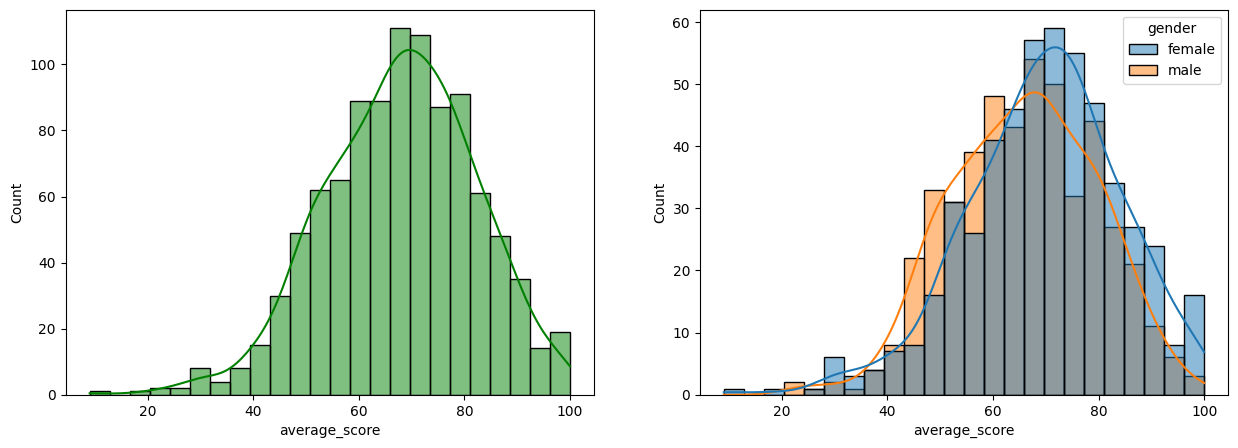

In [16]:
fig,axs=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',hue='gender',kde=True)
plt.show()

#Female students perform well then male students

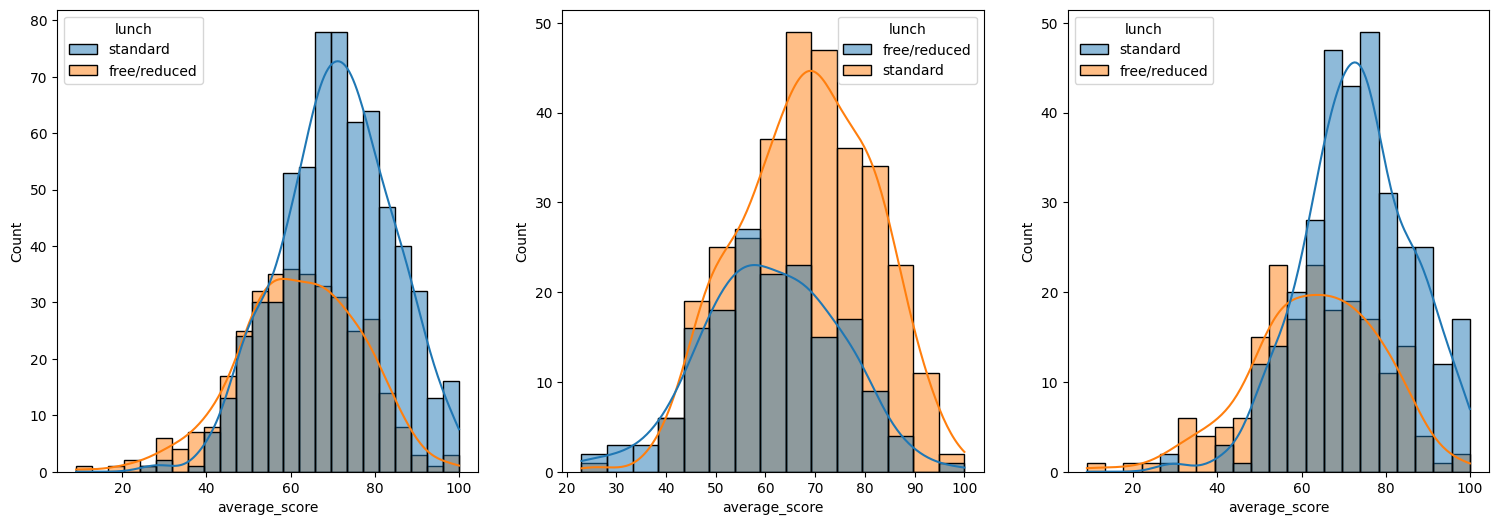

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='lunch')
plt.show()

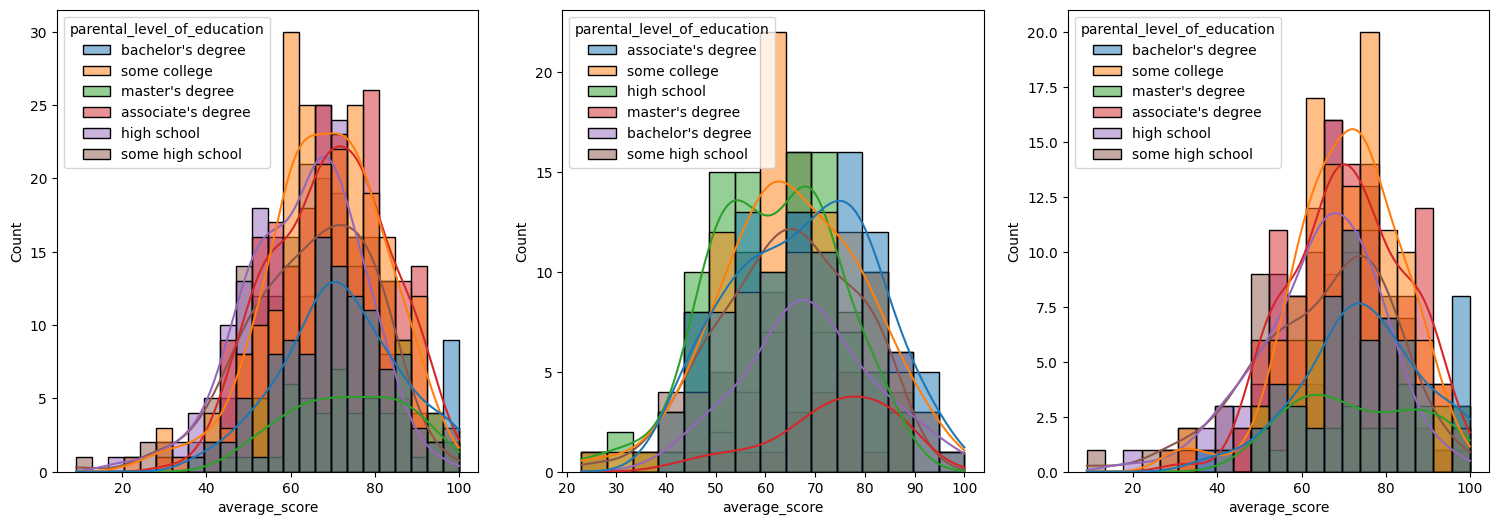

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()